# **Daily Challenge: Hands-On Image Transformation**

** Google Drive + Image Processing**

This notebook shows how to:
- Load images from Google Drive in Google Colab
 - Rotate images
 - Flip images horizontally and vertically
- Zoom in images
 - Display original and transformed images side by side


👉 Importing images from Google Drive to Colab allows you to access files without having to upload them from your local environment each time, facilitating collaborative work and ensuring that your data is available in any Colab session.

In [50]:
# IMPORTS AT THE BEGINNING
from google.colab import drive
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

In [51]:
# MOUNT GOOGLE DRIVE
# Allows access to files stored in Google Drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# DEFINE IMAGE PATH
# older structure:
# MyDrive/
# └── BasesdeDatos/
#     └── 0019.png

image_path = '/content/drive/MyDrive/BasesdeDatos/0019.png'


print(image_path)

/content/drive/MyDrive/BasesdeDatos/0019.png


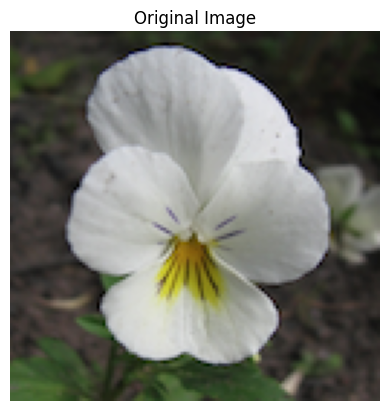

In [53]:
# HELPER FUNCTION TO DISPLAY IMAGES

def show_image(img, title=""):
    """
    Display a PIL image using matplotlib with title and no axes.
    """
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


# LOAD THE IMAGE
img_original = Image.open(image_path)
show_image(img_original, "Original Image")



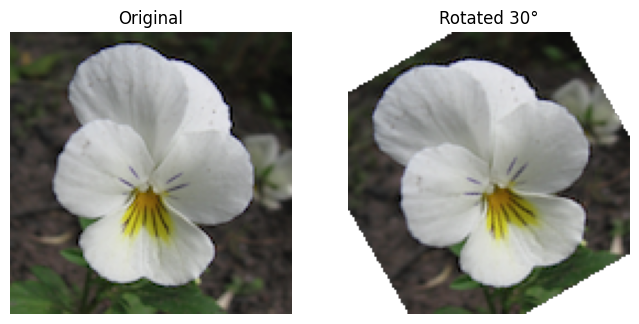

In [54]:
# -----------------------------
# 6️⃣ ROTATE IMAGE BY 30 DEGREES
# -----------------------------
# Convert to numpy array for scipy rotation
img_array = np.array(img_original)


def rotate_image_30_degrees(image_array):
    """
    Rotate an image by 30 degrees without changing its shape.
    """
    return rotate(image_array, 30, reshape=False)

rotated_array = rotate_image_30_degrees(img_array)

# Convert back to uint8 to avoid display issues
rotated_image = Image.fromarray(rotated_array.astype('uint8'))


# Show original and rotated image side by side
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Rotated 30°")
plt.axis('off')
plt.show()


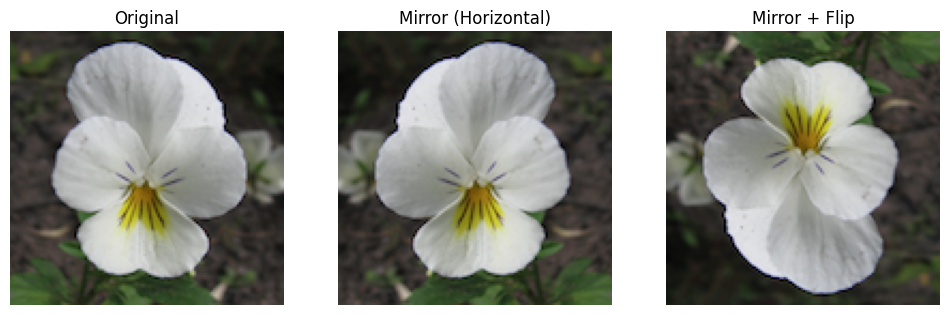

In [55]:
# -----------------------------
#  FLIP IMAGE HORIZONTALLY AND VERTICALLY
# -----------------------------
# Horizontal flip (mirror)
h_flipped = ImageOps.mirror(img_original)

# Vertical flip
hv_flipped = ImageOps.flip(h_flipped)

# Display original, horizontal flip, and both flips
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(h_flipped)
plt.title("Mirror (Horizontal)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(hv_flipped)
plt.title("Mirror + Flip")
plt.axis('off')
plt.show()


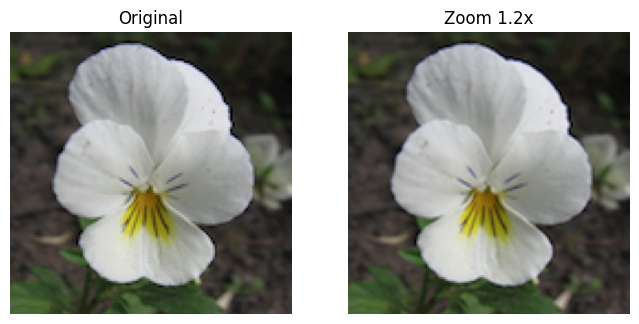

In [56]:

# -----------------------------
# 8️⃣ ZOOM IN IMAGE (1.2x)
# -----------------------------
# Calculate new size
width, height = img_original.size
new_size = (int(width * 1.2), int(height * 1.2))  # PIL requires integers

# Resize image (zoom in)
zoomed_image = img_original.resize(new_size, resample=Image.BICUBIC)

# Show original and zoomed images side by side
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(zoomed_image)
plt.title("Zoom 1.2x")
plt.axis('off')
plt.show()